# Phase Diagram
|Author  | Stanley A. Baronett|
|--------|--------------------|
|Created | 3/23/2022          |
|Updated | 3/30/2022          |

## [Beattie (1993)](https://doi.org/10.1007/BF00712982)
![Beattie (1993), Fig. 4](../img/Beattie_1993_Fig_4.png)
> **Fig. 4.** Phase diagram for the system $\mathrm{Mg}_2\mathrm{Si}\mathrm{O}_4-\mathrm{Fe}_2\mathrm{Si}\mathrm{O}_4$.
The *solid lines* represent the phase diagram calculated using Eqs. 10 and 12 for the forsterite component, *dotted lines* are the phase diagram as calculated by Ghiorso et al.(1983), assuming that the melt phase is a regular solution.
The circles are experimentally determined values (Bowen and Schairer 1935);
the solidus and liquidus compositions are represented by *solid* and *hollow* circles respectively.
Bowen and Schairer estimated the errors to be $\pm4^\circ\,\mathrm{C}$ for all but the $1890^\circ\,\mathrm{C}$ experiment.
It is clear that neither model reproduces the binary exactly, but the equations developed here do reproduce the shape of the phase diagram.
Temperatures in $^\circ\,\mathrm{C}$

### Equations

D_MgO^ol/melt = (2x/3)/(2y/3) = x/y
D_FeO^ol/melt = (1-x)/(1-y)
D_FeO = A*D_MgO+B
(1-x)/(1-y)=A*(x/y)+B
e.g., for x=0.1, solve for y

Try for x=0.2 [Mg0.2Fe0.8]SiO4
D_FeO = A_Fe*D_MgO + B_Fe

Combining activity models, at equilibrium
\begin{equation}
  T^\mathrm{Ol}=\frac{\Delta H_M^\mathrm{Ol}/R+(P-10^5)\Delta V_M^\mathrm{Ol}/R}
  {\Delta S_M^\mathrm{Ol}/R+2\ln D_{M*}^{\mathrm{Ol}/L}+2\ln1.5C_{NM*}^L+2\ln3C_{\mathrm{SiO}_2*}^L-(NF)},
\tag{10}
\end{equation}
where $\Delta H,\,\Delta S$ and $\Delta V$ are the enthalpy, entropy, and volumes of fusion, respectively; $T$ and $P$ are the temperature in Kelvin and pressure in $\mathrm{Pa}$, respectively; $R$ is the gas constant; and $(NF)=7/2\ln(1-C_{\mathrm{AlO}_{1.5*}}^L)+7\ln(1-C_{\mathrm{TiO}_{2*}}^L)$.
For pure olivine compositions, i.e., $[\mathrm{Fe,Mg}]_2\mathrm{SiO}_4$, network-modifying molar concentration $C_{NM*}^L=2/3$, silicate concentration $C_{\mathrm{SiO}_2*}^L=1/3$, and network-forming trace elements $(NF)=0$, so the last three terms in the denominator of Eq. 10 vanish.
At $1\,\mathrm{atm}\approx10^5\,\mathrm{Pa}$, Eq. 10 reduces to
\begin{equation}
  T^\mathrm{Ol}=\frac{\Delta H_M^\mathrm{Ol}/R}
  {\Delta S_M^\mathrm{Ol}/R+2\ln D_{M*}^{\mathrm{Ol}/L}},
\tag{10*}
\end{equation}
where, from Eq. 13,
\begin{equation}
  D_\mathrm{M*}^{\mathrm{Ol}/L}= A_M^\mathrm{Ol} D_\mathrm{Mg*}^{\mathrm{Ol}/L} + B_M^\mathrm{Ol}.
\tag{13*}
\end{equation}

We can parameterize the molar fraction of $\mathrm{MgO}=x$ in a solid olivine crystal, so $\mathrm{FeO}=1-x$.
Similarly, for a liquidus olivine melt, $\mathrm{MgO}=y$, and $\mathrm{FeO}=1-y$.
This gives the following molar partition coefficients:
\begin{align}
  D_\mathrm{MgO}^{\mathrm{Ol}/L}&=\frac{x}{y}\\
  D_\mathrm{FeO}^{\mathrm{Ol}/L}&=\frac{1-x}{1-y}.
\tag{A}
\end{align}
Plugging Eqs. A into Eq. 13*, and solving for $x$ gives
\begin{equation}
  x=\frac{B_\mathrm{FeO}^\mathrm{Ol}y^2-B_\mathrm{FeO}^\mathrm{Ol}y+y}
  {y-A_\mathrm{FeO}^\mathrm{Ol}y+A_\mathrm{FeO}^\mathrm{Ol}}.
\tag{B}
\end{equation}
Thus, for a given molar fraction of forsterite, $\mathrm{MgO}=y$, in an olivine melt, we can simultaneously calculate the equilibrium temperatures for liquidus and solidus phase boundary curves.

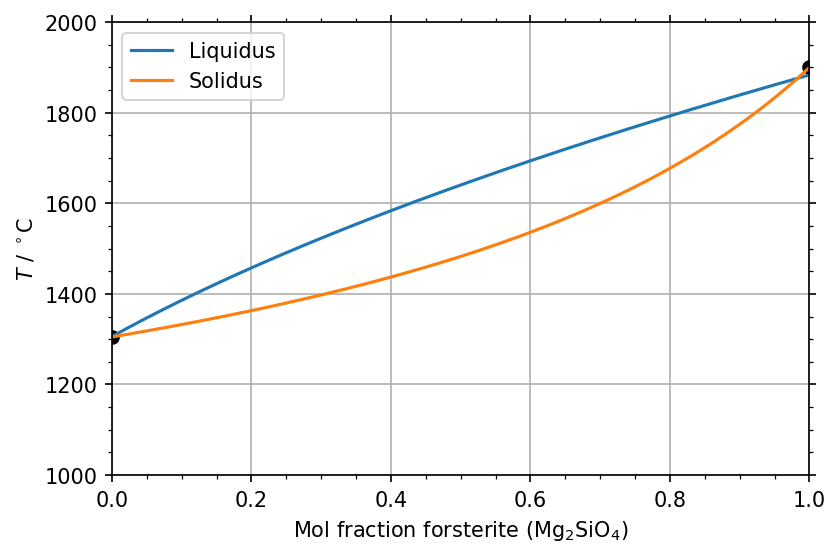

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Physical constants, conversions
R = 8.31446261815324            # gas constant [J/K/mol] or [m³Pa/K/mol]
KtoC = -273.15                  # absolute zero in (deg) C

# Table 1. Empirical constants for Eq. 13
A_Mg, B_Mg = 1.000, 0.000
A_Fe, B_Fe = 0.299, 0.027

# Table 2. Thermodynamic parameters for olivine components in silicate melts
DH_Mg, DH_Fe = 113.1e3, 109.9e3 # [J/mol]
DS_Mg, DS_Fe = 52.05,   69.60   # [J/K/mol]

# Endmember cases
Fo0, T0 = 0, DH_Fe/DS_Fe        #   0% forsterite (100% fayalite, Fe)
Fo1, T1 = 1, DH_Mg/DS_Mg        # 100% forsterite (Mg)

# Eq. 13
y = C_Mg = np.linspace(0.001, 1, 1000, endpoint=False) # mol fraction of forsterite
x = (B_Fe*y**2-B_Fe*y+y)/(y-A_Fe*y+A_Fe)

# Eq. 12
D_Mg = x/y
D_Fe = (1-x)/(1-y)

# Eq. 10
Ts_Mg = (DH_Mg/R)/(DS_Mg/R+2*np.log(D_Mg))
Ts_Fe = (DH_Fe/R)/(DS_Fe/R+2*np.log(D_Fe))

# Plot
fig, ax = plt.subplots(dpi=150)
ax.plot(Fo0, T0+KtoC, 'ko')
ax.plot(Fo1, T1+KtoC, 'ko')
ax.plot(y, Ts_Fe+KtoC, label='Liquidus')
ax.plot(x, Ts_Mg+KtoC, label='Solidus')
ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlabel=r'Mol fraction forsterite (Mg$_2$SiO$_4$)',
       ylabel=r'$T$ / $^\circ\mathrm{C}$',
       xlim=(0, 1), ylim=(1000, 2000))
ax.tick_params(axis='both', which='both', top=True, right=True)